In [11]:
import sys
sys.path.append('../..')

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from qubap.qiskit.jorge.MPS import Ansatz, VQE_pretrained
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian, test_hamiltonian_2
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation

from qiskit_aer import AerSimulator

In [20]:
# Control parameters
num_qubits = 8

num_iters = 200
num_iters_training = 200

num_shots_full  = 2**4

In [14]:
H  = test_hamiltonian_2(num_qubits)

In [15]:
backend_default = AerSimulator(shots=num_shots_full)

In [16]:
qc_mps  = Ansatz(num_qubits, diagonal=True)
qc_full = Ansatz(num_qubits, diagonal=False)

In [17]:
guess_naive = np.random.rand(qc_full.num_parameters) * np.pi
results_naive = VQE(H, qc_full, guess_naive, num_iters, backend_default, returns='fx')

In [18]:
results_trained = VQE_pretrained(H, backend_default, iters_train=num_iters, iters_vqe=num_iters_training, returns='fx')

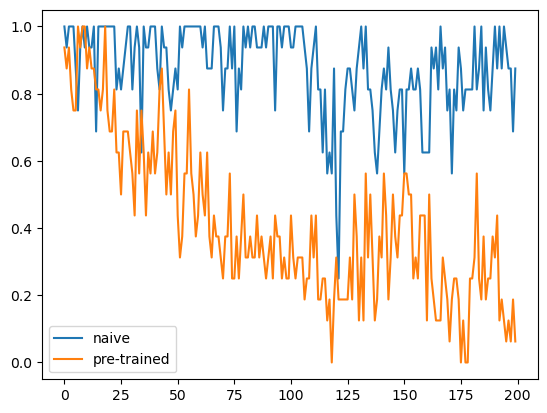

In [19]:
plt.plot(results_naive, label='naive')
plt.plot(results_trained[0], label='pre-trained')
plt.legend(loc='best')